In [1]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/permutations/results.csv
#read in data
snps = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/permutations/results_new_filtering.csv')
#washing phenotype /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/washing_phenotypes.csv
wash_pheno = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/washing_phenotypes.csv')
#import rna seq corrs /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Analysis of Clement-Ziza RNA-seq/wash_corr.csv
wash_corr = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Analysis of Clement-Ziza RNA-seq/wash_corr.csv')
#full snp dataset /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/QTL mapping/SupplementaryDataset_S7_genotype.tsv
full_snps = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/updated_genotype_matrix_final_pos.tsv', sep='\t', header=0)
#load orthologs database /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/final_orthology_database.csv
orthologs = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Orthologs/final_orthology_database.csv')
full_snps_og = full_snps.copy()


In [2]:
#remove first 4 columns
full_snps = full_snps.iloc[:,4:]
#rename column 968 to X968
full_snps.rename(columns={'968':'X968'}, inplace=True)
#re order wash_pheno such that order of strains matches columns in full_snps column names
pca_pheno = pd.DataFrame(columns = ['strain','ratio'])
for i in full_snps.columns:
    #see what is the column name, and find the row in wash_pheno where strain has the same name
    
    row = wash_pheno.loc[wash_pheno['strain'] == i]
    pca_pheno = pca_pheno.append(row)
#pcapheno remove column Unnamed: 0
pca_pheno.drop(columns=['Unnamed: 0'], inplace=True)
#reset index
pca_pheno.reset_index(inplace=True)
#remove chromosome_ from chromosome column
snps['chromosome'] = snps['chromosome'].str.replace('chromosome_', '')
#change chromosome number to roman numbers
snps['chromosome'] = snps['chromosome'].str.replace('1','I')
snps['chromosome'] = snps['chromosome'].str.replace('2','II')
snps['chromosome'] = snps['chromosome'].str.replace('3','III')


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_17400/1422786796.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pca_pheno = pca_pheno.append(row)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_17400/1422786796.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pca_pheno = pca_pheno.append(row)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_17400/1422786796.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pca_pheno = pca_pheno.append(row)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_17400/1422786796.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pca_pheno = pca_pheno.appe

In [3]:
#show snps at chromosome_1 in position +- 10000 around 100011 in full_snps_og
full_snps_og.loc[(full_snps_og['chromosome'] == "chromosome_1") & (full_snps_og['position'] > 159850) & (full_snps_og['position'] < 179850)]



,chromosome,position,968_allele,Y0036_allele,968,Y0036,R1_1,R1_2,R1_3,R1_5,...,R1_9,R1_34,R1_44,R1_49,R1_50,R1_51,R1_52,R1_53,R1_54,R1_4
52,chromosome_1,162963,G,A,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
53,chromosome_1,163061,C,T,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
54,chromosome_1,164921,G,A,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
55,chromosome_1,165673,A,G,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
56,chromosome_1,168534,T,G,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
57,chromosome_1,170928,C,CT,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
58,chromosome_1,173079,A,C,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0
59,chromosome_1,173651,T,G,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0


In [4]:
snps_t = snps.transpose()
#remove first 5 rows
snps_t = snps_t.iloc[5:]
#by matching index of snps_t to column strain in wash_pheno, we can add the phenotype to the snps_t dataframe
snps_t['phenotype'] = wash_pheno.set_index('strain')['ratio']
#rename all but last column to snps df position 
#snps_t all but last columns rename as snps["position"]
ncols = len(snps_t.columns)
snps_t.columns = np.append(snps["position"].values, snps_t.columns[ncols-1]).flatten()

In [5]:
#for each column perform a t-test between phenotypes of rows with 0 and 1
#store p-values in a list
import scipy.stats as st

p_values = []
#iterate through columns
for i in range(0, len(snps_t.columns)-1):
    #get column
    col = snps_t.iloc[:,i]
    #get phenotype column
    pheno = snps_t.iloc[:,-1]
    #get rows with 0 and 1
    col_0 = col[col == 0]
    col_1 = col[col == 1]
    #get phenotype rows with 0 and 1
    pheno_0 = pheno[col == 0]
    pheno_1 = pheno[col == 1]
    #perform t-test
    t, p = st.ttest_ind(pheno_0, pheno_1)
    p_values.append(p)
#add final entry NA
p_values.append("NA")
#add row with index p_vals
snps_t.loc['p_vals'] = p_values
snps_t



,2202682,2228418,2305695,2310884,2311107,2312083,2316554,2316851,2317549,2323914,...,2461512,2461523,2461663,2461833,2461868,2461927,41504,47493,53819,phenotype
X968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.04793
Y0036,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0.172119
R1_1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.054247
R1_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.061369
R1_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.033055
R1_5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0.061934
R1_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.036447
R1_7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.020331
R1_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.04712
R1_10,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.028066


[0.1877057  0.14114441]


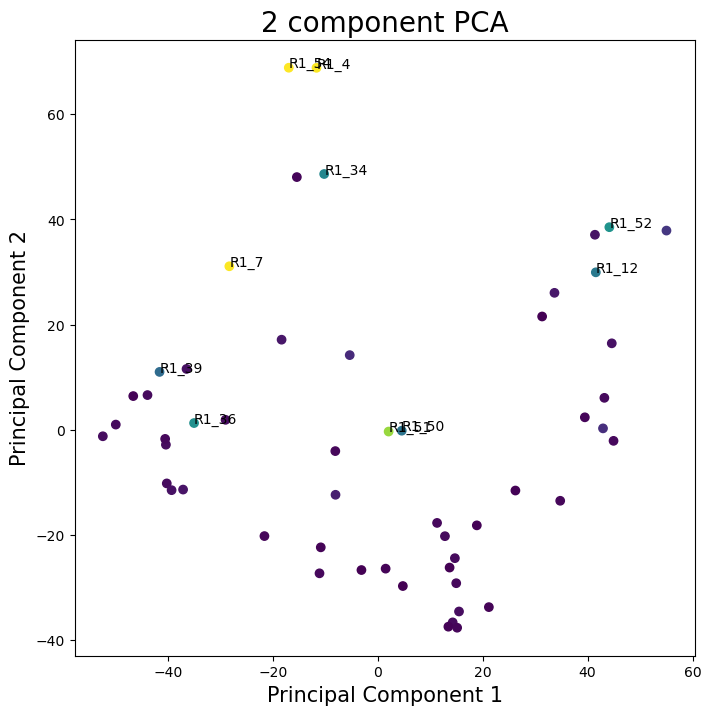

In [6]:
#create PCA plot
#take entries except last column and last row
full_snps_pca = full_snps.T
#perform PCA and label with rownames on plot, and colour by respecitve phenotypes (stored in snps_t ["phenotype"])
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#for NaN values randomly replace them with 0 or 1
for i in range(0, len(full_snps_pca.columns)):
    full_snps_pca.iloc[:,i] = full_snps_pca.iloc[:,i].fillna(np.random.choice([0,1]))
#standardise data
X_std = StandardScaler().fit_transform(full_snps_pca)  
#perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
#add principal components to dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#add phenotype column
principalDf['phenotype'] = snps_t.iloc[:-1,-1].values
#change phenotype column to float
principalDf['phenotype'] = pca_pheno["ratio"].astype(float)

#plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#plot each point and color by viridis based on phenotype value
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['phenotype'], cmap='viridis')
#add rownames for points with phenotype above 0.2 or with names X968 and Y0036. Use snps_t_pca.index
for i in range(0, len(principalDf.index)):
    if principalDf.iloc[i,2] > 0.2 or principalDf.index[i] == 'X968' or principalDf.index[i] == 'Y0036':
        ax.annotate(pca_pheno["strain"][i], (principalDf.iloc[i,0], principalDf.iloc[i,1]))
#add variance explained by each component
print(pca.explained_variance_ratio_)
plt.show()

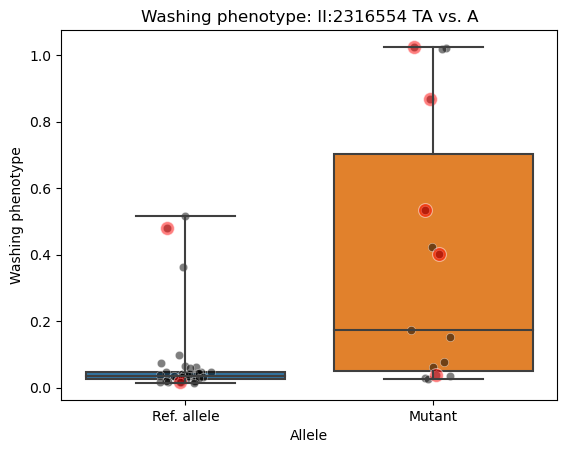

In [7]:
#create a new df with 2 columns: phenotype and colum 2528629 if 0 say Ref. allele, if 1 say Mutant
df_plot = pd.DataFrame(columns = ['phenotype','allele'])
df_plot['phenotype'] = snps_t.iloc[:,-1]
 #which column is called 2528629
col_index = snps_t.columns.get_loc("2316554")
df_plot['allele'] = snps_t.iloc[:,col_index]
df_plot['allele'] = df_plot['allele'].replace(0, 'Ref. allele')
df_plot['allele'] = df_plot['allele'].replace(1, 'Mutant')
#keep only rows with Ref. allele or Mutant
df_plot = df_plot[(df_plot['allele'] == 'Ref. allele') | (df_plot['allele'] == 'Mutant')]

#PLOT data now with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#keep only rows with Ref. allele or Mutant
df_plot = df_plot[(df_plot['allele'] == 'Ref. allele') | (df_plot['allele'] == 'Mutant')]
#create boxplot with outliers as circles and overlay data with scatterplot
sns.boxplot(x="allele", y="phenotype", data=df_plot, whis=np.inf)
#create a jitter of the data and plot that on a scatter plot by adding jitter the Ref. allele and Mutant columns
df_plot['x_coords'] = df_plot['allele'].apply(lambda x: np.random.normal(0, 0.05) if x == 'Ref. allele' else np.random.normal(1, 0.05))
sns.scatterplot(x="x_coords", y="phenotype", data=df_plot, color="black", alpha=0.5)
#plot datapoints with red if their index is in R1_34, R1_44, R1_45, R1_48, R1_49, R1_50, R1_51, R1_52, R1_53, R1_54
for i in range(0, len(df_plot.index)):
      if df_plot.index[i] in ['R1_34', 'R1_44', 'R1_45', 'R1_48', 'R1_49', 'R1_50', 'R1_51', 'R1_52', 'R1_53', 'R1_54']:
            sns.scatterplot(x="x_coords", y="phenotype", data=df_plot.iloc[i:i+1], color="red", alpha=0.5, s=100)
      


plt.title("Washing phenotype: II:2316554 TA vs. A")
plt.xlabel("Allele")
plt.ylabel("Washing phenotype")
#also label each point with strain name

plt.show(p)

In [8]:
#create a new df with 2 columns: phenotype and colum 2528629 if 0 say Ref. allele, if 1 say Mutant
df_plot = pd.DataFrame(columns = ['phenotype','allele'])
df_plot['phenotype'] = snps_t.iloc[:,-1]
 #which column is called 2528629
col_index = snps_t.columns.get_loc("2527314")
df_plot['allele'] = snps_t.iloc[:,col_index]
df_plot['allele'] = df_plot['allele'].replace(0, 'Ref. allele')
df_plot['allele'] = df_plot['allele'].replace(1, 'Mutant')
#keep only rows with Ref. allele or Mutant
df_plot = df_plot[(df_plot['allele'] == 'Ref. allele') | (df_plot['allele'] == 'Mutant')]

#PLOT data now with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#keep only rows with Ref. allele or Mutant
df_plot = df_plot[(df_plot['allele'] == 'Ref. allele') | (df_plot['allele'] == 'Mutant')]
#create boxplot with outliers as circles and overlay data with scatterplot
sns.boxplot(x="allele", y="phenotype", data=df_plot, whis=np.inf)
#create a jitter of the data and plot that on a scatter plot by adding jitter the Ref. allele and Mutant columns
df_plot['x_coords'] = df_plot['allele'].apply(lambda x: np.random.normal(0, 0.05) if x == 'Ref. allele' else np.random.normal(1, 0.05))
sns.scatterplot(x="x_coords", y="phenotype", data=df_plot, color="black", alpha=0.5)
#plot datapoints with red if their index is in R1_34, R1_44, R1_45, R1_48, R1_49, R1_50, R1_51, R1_52, R1_53, R1_54
for i in range(0, len(df_plot.index)):
      if df_plot.index[i] in ['R1_34', 'R1_44', 'R1_45', 'R1_48', 'R1_49', 'R1_50', 'R1_51', 'R1_52', 'R1_53', 'R1_54']:
            sns.scatterplot(x="x_coords", y="phenotype", data=df_plot.iloc[i:i+1], color="red", alpha=0.5, s=100)
      


plt.title("Washing phenotype: II:2527314 T vs. A")
plt.xlabel("Allele")
plt.ylabel("Washing phenotype")
#also label each point with strain name

plt.show(p)


KeyError: '2527314'

In [9]:
#pandas read in "/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Pombe genome annotation.gff3"
import pandas as pd
df = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Pombe genome annotation.gff3', sep='\t', header=1)
#break last column into 2 at ;
df[['a','b']] = df["ID=SPAC1002.01;Name=mrx11"].str.split(';',expand=True)
#remove column ID=SPAC1002.01;Name=mrx11
df.drop(columns =["ID=SPAC1002.01;Name=mrx11"], inplace = True)
#remove ID= from column a and rename it to ID
df['ID'] = df['a'].str.replace('ID=', '')
#remove column a
df.drop(columns =['a','PomBase',".","..1"], inplace = True)
#rename b to Parent
df.rename(columns={'b':'Parent','gene':'object','I':'chromosome','1798347':"start",'1798835':"end","+":"strand"}, inplace=True)
#In parent remove anything before =
df['Parent'] = df['Parent'].str.replace('Parent=', '')
#or Name=
df['Parent'] = df['Parent'].str.replace('Name=', '')
#create an aempty column called detail
df['detail'] = ""
#split ID column at :, and if there is something after put it in detail column
df['detail'] = df['ID'].str.split(':', expand=True)[1]
#split ID column at :, and if there is something before put it in ID column
df['ID'] = df['ID'].str.split(':', expand=True)[0]

In [10]:
#find a subset of df, where snps[position] is +- 1000 of df[start] or df[end]. Create a result df, and say which snps were there
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

result = pd.DataFrame()
for i in range(len(snps)):
    for j in range(len(df)):
        if snps['position'][i] >= df['start'][j] - 500 and snps['position'][i] <= df['end'][j] + 500:
            #and if chromsome is chromosome_2 for df chromsome II etc
            if snps['chromosome'][i] == df['chromosome'][j]:
                result = result.append({'position': snps['position'][i], 'ID': df['ID'][j], 'Parent': df['Parent'][j], 'object': df['object'][j], 'chromosome': df['chromosome'][j], 'start': df['start'][j], 'end': df['end'][j], 'strand': df['strand'][j], 'detail': df['detail'][j]}, ignore_index=True)
result

#if the last two characters are .1, remove them
for i in range(len(result)):
    if result['ID'][i][-2:] == ".1":
        result['ID'][i] = result['ID'][i][:-2]



In [11]:
#find the p_value of the snp position matches snps_t column_name
#add a column to result called p_value
pvals = np.array([])
for i in range(len(result)):
    for j in range(len(snps_t.columns)):
        #skip if colum nname is phenotype
        if snps_t.columns[j] == 'phenotype':
            continue
        if result['position'][i] == int(snps_t.columns[j]):
            pvals = np.append(pvals, snps_t.iloc[46,j])
result['p_value'] = pvals


In [12]:
#match ID with systematic name in wash_corr and add columns gene	correlation	p-value
#create np.arrays with NAs
corrs = np.array([np.nan]*len(result))
pvals = np.array([np.nan]*len(result))
genes = np.array([np.nan]*len(result), dtype=object)
for i in range(len(result)):
    for j in range(len(wash_corr)):
        if result['ID'][i] == wash_corr['systematic_names'][j]:
            corrs[i] = wash_corr['correlation'][j]
            pvals[i] = wash_corr['p-value'][j]
            genes[i] = wash_corr['gene'][j]

            


result['correlation'] = corrs
result['p_value_corr'] = pvals
result['gene'] = genes

In [13]:


import sys, re

f=open('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Schizosaccharomyces_pombe_all_chromosomes.fa','r')
lines=f.readlines()

hre=re.compile('>(\S+)')
lre=re.compile('^(\S+)$')

regions={}

for line in lines:
        outh = hre.search(line)
        if outh:
                id=outh.group(1)
        else:
                outl=lre.search(line)
                if(id in regions.keys()):
                        regions[id] += outl.group(1)
                else:
                        regions[id]  =outl.group(1)

In [14]:
#result_final___ only keep rows where snp is between start and end
result_final__ = result.copy()
result_final___ = result_final__.copy()
result_final___ = result_final___[(result_final___['position'] >= result_final___['start']-10) & (result_final___['position'] <= result_final___['end']+100)]

gene_exons = df.copy()
#only keep rows where object is CDS
gene_exons = gene_exons[gene_exons['object'] == 'CDS']
#only keep rows where ID is in result_final__['ID']
gene_exons_final = pd.DataFrame()
for i in np.unique(result_final___['ID']):
      df_subset = gene_exons[gene_exons['ID'] == str(i + ".1")]
      gene_exons_final = gene_exons_final.append(df_subset)
#reset index
gene_exons_final.reset_index(inplace=True)
#make a column exon_number
gene_exons_final['exon_number'] = np.nan
#for those where ID is multiple times, number the exons by increasing start if strand is +, or decreasing start if strand is -
for i in np.unique(gene_exons_final['ID']):
    df_subset = gene_exons_final[gene_exons_final['ID'] == i]
    if df_subset['strand'].values[0]== '+':
        df_subset = df_subset.sort_values(by=['start'], ascending=True)
    if df_subset['strand'].values[0] == '-':
        df_subset = df_subset.sort_values(by=['end'], ascending=False)
    df_subset['exon_number'] = np.arange(1, len(df_subset) + 1)
    gene_exons_final[gene_exons_final['ID'] == i] = df_subset


#REMOVE entries wehre ID contains SPNCRNA
gene_exons_final = gene_exons_final[~gene_exons_final['ID'].str.contains('SPNCRNA')]





#make a column called real_start
gene_exons_final['old_start'] = gene_exons_final['start']
gene_exons_final['old_end'] = gene_exons_final['end']
#for rows where strand is + look at the load the bases +- 5 around the start from regions
for i in np.unique(gene_exons_final['ID']):
    df_subset = gene_exons_final[gene_exons_final['ID'] == i]
    df_subset = df_subset[df_subset['exon_number'] == 1]
    if df_subset['strand'].values[0]== '+':
        seq = regions[df_subset['chromosome'].values[0]][int(df_subset['start'].values[0]-5):int(df_subset['start'].values[0]+5)]
        #where does ATG occur in seq
        real_start = seq.find('ATG')-4
        real_start = df_subset['start'] + real_start
        #for the row in gene_exons_final where ID is i and exon_number is 1, change the start to real_start
        gene_exons_final.loc[(gene_exons_final['ID'] == i) & (gene_exons_final['exon_number'] == 1), 'start'] = real_start



    else:
        seq_rev = regions[df_subset['chromosome'].values[0]][int(df_subset['end'].values[0]-5):int(df_subset['end'].values[0]+5)]
        real_end = seq_rev.find('CAT')+2-4
        real_end = df_subset['end'] + real_end
        #for the row in gene_exons_final where ID is i and exon_number is 1, change the end to real_end
        gene_exons_final.loc[(gene_exons_final['ID'] == i) & (gene_exons_final['exon_number'] == 1), 'end'] = real_end


    df_subset = gene_exons_final[gene_exons_final['ID'] == i]
    highest_exon = df_subset['exon_number'].max()
    df_subset = df_subset[df_subset['exon_number'] == highest_exon]
    if df_subset['strand'].values[0]== '+':

        seq2 = regions[df_subset['chromosome'].values[0]][int(df_subset['end'].values[0]-5):int(df_subset['end'].values[0]+5)]
        real_end = seq2.find('TAA')+2-4
        real_end = df_subset['end'] + real_end
        #for the row in gene_exons_final where ID is i and exon_number is highest_exon, change the end to real_end
        gene_exons_final.loc[(gene_exons_final['ID'] == i) & (gene_exons_final['exon_number'] == highest_exon), 'end'] = real_end
    else:
        seq2_rev = regions[df_subset['chromosome'].values[0]][int(df_subset['start'].values[0]-5):int(df_subset['start'].values[0]+5)]
        real_start = seq2_rev.find('TCA')+2-4
        real_start = df_subset['start'] + real_start
        #for the row in gene_exons_final where ID is i and exon_number is highest_exon, change the start to real_start
        gene_exons_final.loc[(gene_exons_final['ID'] == i) & (gene_exons_final['exon_number'] == highest_exon), 'start'] = real_start


    
    



#for each row calculate the length of the exon
gene_exons_final['exon_length'] = abs(gene_exons_final['end'] - gene_exons_final['start'])+1

#remove rows where ID is NaN
gene_exons_final = gene_exons_final[~gene_exons_final['ID'].isna()]
#for each row calculate the length of the CDS until that exon starts
gene_exons_final['CDS_length_so_far'] = np.nan
for i in np.unique(gene_exons_final['ID']):
    df_subset = gene_exons_final[gene_exons_final['ID'] == i]
    #order by exon_number
    df_subset = df_subset.sort_values(by=['exon_number'])
    
    df_subset['CDS_length_so_far'] = np.append(np.array(0),df_subset['exon_length'].cumsum())[:-1]
    gene_exons_final[gene_exons_final['ID'] == i] = df_subset
#add total cds length
gene_exons_final['total_CDS_length'] = np.nan
for i in np.unique(gene_exons_final['ID']):
    df_subset = gene_exons_final[gene_exons_final['ID'] == i]
    df_subset['total_CDS_length'] = sum(df_subset['exon_length'])
    gene_exons_final[gene_exons_final['ID'] == i] = df_subset

gene_exons_final

,index,chromosome,object,start,end,strand,Parent,ID,detail,exon_number,old_start,old_end,exon_length,CDS_length_so_far,total_CDS_length
0,17268,II,CDS,2461357,2461495,-,SPBC12C2.08.1,SPBC12C2.08.1,exon,1.0,2461357,2461495,139,0.0,2347.0
1,17270,II,CDS,2459018,2461225,-,SPBC12C2.08.1,SPBC12C2.08.1,exon,2.0,2459019,2461225,2208,139.0,2347.0
2,17280,II,CDS,2452052,2452181,+,SPBC12C2.10c.1,SPBC12C2.10c.1,exon,1.0,2452052,2452181,130,0.0,4566.0
3,17282,II,CDS,2452319,2456754,+,SPBC12C2.10c.1,SPBC12C2.10c.1,exon,2.0,2452319,2456757,4436,130.0,4566.0
4,17287,II,CDS,2450850,2450854,-,SPBC12C2.11.1,SPBC12C2.11.1,exon,1.0,2450850,2450854,5,0.0,2094.0
5,17289,II,CDS,2450711,2450781,-,SPBC12C2.11.1,SPBC12C2.11.1,exon,2.0,2450711,2450781,71,5.0,2094.0
6,17291,II,CDS,2448488,2450505,-,SPBC12C2.11.1,SPBC12C2.11.1,exon,3.0,2448491,2450505,2018,76.0,2094.0
7,17296,II,CDS,2446698,2447606,+,SPBC12C2.12c.1,SPBC12C2.12c.1,exon,1.0,2446698,2447606,909,0.0,909.0
8,17301,II,CDS,2444329,2445924,+,SPBC12C2.13c.1,SPBC12C2.13c.1,exon,1.0,2444329,2445924,1596,0.0,1596.0
9,17309,II,CDS,2304182,2305726,+,SPBC12D12.01.1,SPBC12D12.01.1,exon,1.0,2304182,2305726,1545,0.0,1545.0


In [15]:
#add to each row the unique number of positions that ID had
#add a column called unique
#remove duplicates of ID and position
#keep only entries with "object" is CDS
result = result[result['object'] == 'CDS']
result_final = result.drop_duplicates(subset=['ID', 'position'])
#reset index
result_final = result_final.reset_index(drop=True)
unique = np.array([])
for i in range(len(result_final)):
    #get the ID
    ID = result_final['ID'][i]
    #get the number of times ID appears in result
    count = len(result_final[result_final['ID'] == ID])
    #add count to unique
    unique = np.append(unique, count)
result_final['unique'] = unique



In [16]:
result_final

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,unique
0,2202682,SPBC1815.01,SPBC1815.01.1,CDS,II,2201237,2202556,+,exon,1.0,0.047755,0.721860,eno101,1.0
1,2202682,SPNCRNA.5536,SPNCRNA.5536.1,CDS,II,2202759,2204257,+,exon,1.0,NaN,NaN,NaN,1.0
2,2228418,SPBC14C8.14c,SPBC14C8.14c.1,CDS,II,2228791,2228988,-,exon,1.0,-0.283943,0.030769,pol5,1.0
3,2228418,SPNCRNA.5547,SPNCRNA.5547.1,CDS,II,2228858,2229855,+,exon,1.0,NaN,NaN,NaN,1.0
4,2305695,SPBC12D12.01,SPBC12D12.01.1,CDS,II,2304182,2305726,+,exon,1.0,-0.064586,0.630044,sad1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,47493,SPCC757.03c,SPCC757.03c.1,CDS,III,47741,48475,-,exon,0.0,0.361852,0.005254,hsp3101,1.0
149,47493,SPNCRNA.1099,SPNCRNA.1099.1,CDS,III,46987,47566,+,exon,0.0,-0.092032,0.492020,SPNCRNA.1099,1.0
150,47493,SPNCRNA.1100,SPNCRNA.1100.1,CDS,III,47513,48882,+,exon,0.0,0.206803,0.119335,hsp3101-antisense-1,1.0
151,53819,SPCC757.05c,SPCC757.05c.1,CDS,III,52910,54112,-,exon,0.0,0.167726,0.208214,SPCC757.05c,1.0


In [17]:
#show SPBC290.07 in result
#gather positions for each ID, and put in a single entry as a list. Add that to the df. THen remove duplicated IDs
result_final_ = result_final.groupby('ID')['position'].apply(list).reset_index(name='positions')
result_final__ = pd.merge(result_final, result_final_, on='ID')

#remove duplicates of ID
result_final__ = result_final__.drop_duplicates(subset=['ID'])

#reset index
result_final__ = result_final__.reset_index(drop=True)

In [18]:
#iterate through result_final__. If ID is found in orthologs, then add the albicans_name(s)cerevisiae_name(s) to the df
from numpy import dtype

albicans_names = np.array([np.nan]*len(result_final__),dtype=object)
cerevisiae_names = np.array([np.nan]*len(result_final__),dtype=object)
for i in range(len(result_final__)):
    for j in range(len(orthologs)):
        if result_final__['ID'][i] in orthologs['pombe_name(s)'][j]:
            albicans_names[i] = orthologs['albicans_name(s)'][j]
            cerevisiae_names[i] = orthologs['cerevisiae_name(s)'][j]
#add to df
result_final__['albicans_name(s)'] = albicans_names
result_final__['cerevisiae_name(s)'] = cerevisiae_names

In [19]:
#sort by p_value
result_final__ = result_final__.sort_values(by=['p_value_corr'])
result_final__.head(50)

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,unique,positions,albicans_name(s),cerevisiae_name(s)
27,2367068,SPBC19G7.09,SPBC19G7.09.1,CDS,II,2367117,2368823,+,exon,0.0,-0.430714,0.000738,ulp1,1.0,[2367068],NaN,NaN
79,47493,SPCC757.03c,SPCC757.03c.1,CDS,III,47741,48475,-,exon,0.0,0.361852,0.005254,hsp3101,1.0,[47493],['C3_02610C_A'],['YDR533C' 'YMR322C' 'YOR391C' 'YPL280W']
77,41504,SPNCRNA.1097,SPNCRNA.1097.1,CDS,III,39627,41424,-,exon,0.0,0.348098,0.007415,SPNCRNA.1097,1.0,[41504],NaN,NaN
48,2427851,SPBC21D10.09c,SPBC21D10.09c.1,CDS,II,2426785,2431588,+,exon,0.0,-0.290128,0.027161,rkr1,1.0,[2427851],NaN,NaN
34,2380243,SPNCRNA.1508,SPNCRNA.1508.1,CDS,II,2380550,2382306,-,exon,0.0,0.285174,0.030021,iws1-antisense-1,1.0,[2380243],NaN,NaN
2,2228418,SPBC14C8.14c,SPBC14C8.14c.1,CDS,II,2228791,2228988,-,exon,1.0,-0.283943,0.030769,pol5,1.0,[2228418],NaN,NaN
76,41504,SPNCRNA.07,SPNCRNA.07.1,CDS,III,41985,42728,-,exon,0.0,0.231262,0.080697,meu3,1.0,[41504],NaN,NaN
40,2418555,SPBC1921.06c,SPBC1921.06c.1,CDS,II,2417166,2418302,-,exon,0.0,-0.214157,0.106471,pvg3,1.0,[2418555],NaN,NaN
16,2327939,SPBC24C6.05,SPBC24C6.05.1,CDS,II,2327506,2327536,+,exon,1.0,0.208311,0.116605,sec28,3.0,"[2327939, 2328246, 2328339]",['C5_00080C_A'],['YIL076W']
81,47493,SPNCRNA.1100,SPNCRNA.1100.1,CDS,III,47513,48882,+,exon,0.0,0.206803,0.119335,hsp3101-antisense-1,1.0,[47493],NaN,NaN


In [20]:
result_final__ = result.copy().reset_index(drop=True, inplace=False)

In [21]:
#iterate through positions in result_final__  and find the corresponding alleles in snps. Then add the two values in X968_allele	Y0036_allele to the df in two new columns at the start 
#add two columns to result_final__
result_final__['X968_allele'] = np.nan
result_final__['Y0036_allele'] = np.nan
for i in range(len(result_final__)):
    for j in range(len(snps)):
        if result_final__['position'][i] == snps['position'][j]:
            result_final__['X968_allele'][i] = snps['X968_allele'][j]
            result_final__['Y0036_allele'][i] = snps['Y0036_allele'][j]

In [22]:
#iterate through positions in result_final__ and look up the chromosome and position in regions, and find the corresponding letter +/- 5 bp in regions. Add it to a new column
result_final__['reference_seq']=np.nan
for i in range(len(result_final__)):
    for j in range(len(regions)):
        if result_final__['chromosome'][i] == list(regions.keys())[j]:
            #add | | characters left and right of tletter at position-1
            
            result_final__['reference_seq'][i] = regions[list(regions.keys())[j]][result_final__['position'][i]-4:result_final__['position'][i]-1] + ' |' + regions[list(regions.keys())[j]][result_final__['position'][i]-1] + '| ' + regions[list(regions.keys())[j]][result_final__['position'][i]:result_final__['position'][i]+3] 

#if strand is -, reverse reference_seq
for i in range(len(result_final__)):
    if result_final__['strand'][i] == '-':
        result_final__['reference_seq'][i] = result_final__['reference_seq'][i][::-1]
        #also flip the alleles
        result_final__['X968_allele'][i] = result_final__['X968_allele'][i][::-1]
        result_final__['Y0036_allele'][i] = result_final__['Y0036_allele'][i][::-1]
#also create reference_seq_ without the | | characters
result_final__['reference_seq_'] = result_final__['reference_seq'].str.replace('|', '')
result_final__['reference_seq_'] = result_final__['reference_seq_'].str.replace(' ', '')




In [60]:
#create column, whole gene as codons
result_final__['wt_gene'] = np.nan
#iterate through result_final__ positions. If object is CDS, then look up the sequence from start to end in regions.
#add the sequence to the df
for i in range(len(result_final__)):
    
    if result_final__['object'][i] == 'CDS':
    
        start = result_final__['start'][i]
        end = result_final__['end'][i]
        chrom = result_final__['chromosome'][i]
        pos = result_final__['position'][i]
        gene = regions[chrom][start-1:end]
        #gene_exons_final where start is the same as start in result_final__
        exon = gene_exons_final[(gene_exons_final['start'] < start+20) & (gene_exons_final['end'] > end-20)] 
        #if exon is empty, then print gene name
        if exon.empty:
            print(result_final__['ID'][i])
            continue
        exon_len_so_far=0
        exon_len_so_far = exon['CDS_length_so_far'].values[0]
        exon_len_so_far=exon_len_so_far%3
        if pos > start and pos < end:
        
            if result_final__['strand'][i] == '-':
                
                gene = gene[::-1]
            
                gene = ''.join(gene)
            gene = 'A'*int(exon_len_so_far) + gene
            #write the gene as triplets of letters like AAA, ATC, etc
            #if divisible by 3
            if len(gene)%3 != 0:
                gene = gene[:-(len(gene)%3)]
            gene = [gene[i:i+3] for i in range(0, len(gene), 3)]
                #only triplets near the position
            if result_final__['strand'][i] == '+':
                gene = gene[(pos-(start-int(exon_len_so_far)))//3-2:(pos-end)//3+25]
            else: 
                gene = gene[(end-pos)//3-2:(start-int(exon_len_so_far)-pos)//3+25]
            
                
                


            result_final__['wt_gene'][i] = gene

result_final__['mutant allele'] = np.nan
for i in range(len(result_final__)):
    if result_final__['object'][i] == 'CDS':
    
        start = result_final__['start'][i]
        end = result_final__['end'][i]
        chrom = result_final__['chromosome'][i]
        pos = result_final__['position'][i]
        gene = regions[chrom][start-1:end]
         #gene_exons_final where start is the same as start in result_final__
        exon = gene_exons_final[(gene_exons_final['start'] < start+20) & (gene_exons_final['end'] > end-20)] 
        #if exon is empty, then print gene name
        if exon.empty:
            print(result_final__['ID'][i])
            continue
        exon_len_so_far=0
        exon_len_so_far = exon['CDS_length_so_far'].values[0]
        exon_len_so_far=exon_len_so_far%3
        if pos > start and pos < end:
        
            if result_final__['strand'][i] == '+':
                #decide which allele to use
                #check 
                #check how long the y0036 allele is 
                x968_len = len(result_final__['X968_allele'][i])
                y0036_len = len(result_final__['Y0036_allele'][i])
                
                mutation = result_final__['Y0036_allele'][i]
               

                gene = gene[:pos-start] + mutation + gene[pos-start+x968_len:]
            elif result_final__['strand'][i] == '-':
                x968_len = len(result_final__['X968_allele'][i])
                y0036_len = len(result_final__['Y0036_allele'][i])
                gene = gene[::-1]
                gene = ''.join(gene)
                mutation = result_final__['Y0036_allele'][i]
                
                gene = gene[:end-pos] + mutation + gene[end-pos+x968_len:]
                
            gene = 'A'*int(exon_len_so_far) + gene
            if len(gene)%3 != 0:
                gene = gene[:-(len(gene)%3)]
            gene = [gene[k:k+3] for k in range(0, len(gene), 3)]
                #only triplets near the position
            if result_final__['strand'][i] == '+':
                gene = gene[(pos-(start-int(exon_len_so_far)))//3-2:(pos-end)//3+25]
            else:
                gene = gene[(end-pos)//3-2:(start-int(exon_len_so_far)-pos)//3+25]
            result_final__["mutant allele"][i] = gene
                
           


SPNCRNA.5536
SPNCRNA.5547
SPNCRNA.5597
SPNCRNA.5600
SPNCRNA.1503
SPNCRNA.1503
SPNCRNA.1504
SPNCRNA.1503
SPNCRNA.1504
SPNCRNA.1503
SPNCRNA.1504
SPNCRNA.1503
SPNCRNA.1504
SPNCRNA.1503
SPNCRNA.1504
SPNCRNA.1503
SPBC24C6.09c
SPNCRNA.1505
SPNCRNA.5612
SPNCRNA.5615
SPNCRNA.5615
SPBC19G7.09
SPNCRNA.1507
SPNCRNA.5616
SPNCRNA.5617
SPBC19G7.16
SPBC19G7.19
SPBC19G7.19
SPBC19G7.19
SPNCRNA.1508
SPNCRNA.5627
SPNCRNA.5627
SPNCRNA.5629
SPNCRNA.1512
SPNCRNA.5647
SPNCRNA.5647
SPNCRNA.5647
SPBC21D10.10
SPNCRNA.5652
SPNCRNA.5653
SPNCRNA.5654
SPNCRNA.5657
SPNCRNA.1513
SPNCRNA.1513
SPNCRNA.5659
SPNCRNA.5660
SPNCRNA.5661
SPNCRNA.5659
SPNCRNA.5660
SPNCRNA.5661
SPNCRNA.5659
SPNCRNA.5660
SPNCRNA.5661
SPNCRNA.5662
SPNCRNA.5660
SPNCRNA.5661
SPNCRNA.5662
SPNCRNA.1514
SPNCRNA.5662
SPNCRNA.1514
SPNCRNA.5663
SPNCRNA.5663
SPNCRNA.5663
SPSNORNA.38
SPNCRNA.1515
SPNCRNA.5664
SPNCRNA.1515
SPNCRNA.5664
SPNCRNA.1515
SPNCRNA.5664
SPNCRNA.5665
SPNCRNA.5665
SPBC12C2.09c
SPNCRNA.5669
SPNCRNA.5670
SPNCRNA.5671
SPNCRNA.1516
SPNCR

In [61]:
len(result_final__['Y0036_allele'][49])

2

In [62]:
#CreATE A DF WHERE WHOLE GENE IS NOT NAN
stop_codon_df = result_final__[result_final__['wt_gene'].notna()]
stop_codon_df["stop_codon_predicted"] = np.nan
#iterate through mutant allele, and see whether it contains
#reset index
stop_codon_df = stop_codon_df.reset_index(drop=True)

for i in range(len(stop_codon_df)):
    for j in range(len(stop_codon_df['mutant allele'][i])):
        if stop_codon_df["strand"][i] == '+':
            if stop_codon_df['mutant allele'][i][j] == 'TAA' or stop_codon_df['mutant allele'][i][j] == 'TAG' or stop_codon_df['mutant allele'][i][j] == 'TGA':
                stop_codon_df['stop_codon_predicted'][i] = 'yes'
        else:
            if stop_codon_df['mutant allele'][i][j] == 'ATT' or stop_codon_df['mutant allele'][i][j] == 'ATC' or stop_codon_df['mutant allele'][i][j] == 'ACT':
                stop_codon_df['stop_codon_predicted'][i] = 'yes'
#show which entries have a stop codon predicted
stop_codon_df[stop_codon_df['stop_codon_predicted'] == 'yes']


,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,X968_allele,Y0036_allele,reference_seq,reference_seq_,wt_gene,mutant allele,stop_codon_predicted
3,2310884,SPNCRNA.5593,SPNCRNA.5593.1,CDS,II,2310853,2311405,+,exon,1.0,NaN,NaN,NaN,C,T,CAG |C| ATC,CAGCATC,"[TTC, ACA, GCA, TCT, AGG, GAA, GGA, GGT, TTC, ...","[TTC, ACA, GTA, TCT, AGG, GAA, GGA, GGT, TTC, ...",yes
5,2311107,SPNCRNA.5593,SPNCRNA.5593.1,CDS,II,2310853,2311405,+,exon,1.0,NaN,NaN,NaN,G,C,AAC |G| GAT,AACGGAT,"[ATA, GAA, ACG, GAT, GCT, TTG, TCA, TTT, TCC, ...","[ATA, GAA, ACC, GAT, GCT, TTG, TCA, TTT, TCC, ...",yes
7,2316851,SPBC12D12.06,SPBC12D12.06.1,CDS,II,2316770,2317136,+,exon,1.0,0.019293,0.885703,srb11,TA,T,TGC |T| AAA,TGCTAAA,"[TAC, ATG, CTA, AAA, AAA, AAT, GAG, GAA, AAG, ...","[TAC, ATG, CTA, AAA, AAA, ATG, AGG, AAA, AGG, ...",yes
10,2326615,SPNCRNA.5602,SPNCRNA.5602.1,CDS,II,2325881,2326882,-,exon,1.0,NaN,NaN,NaN,C,A,ACT |C| TAG,ACTCTAG,"[GCT, ACT, CTA, GCG, TTT, GTC, GCA, GAT, TCA, ...","[GCT, ACT, ATA, GCG, TTT, GTC, GCA, GAT, TCA, ...",yes
18,2387677,SPNCRNA.5628,SPNCRNA.5628.1,CDS,II,2387488,2388232,-,exon,0.0,NaN,NaN,NaN,A,G,AAA |A| TAG,AAAATAG,"[CGC, TCA, AAA, TAG, TAG, TCA, ATT, TCG, AGA, ...","[CGC, TCA, AAG, TAG, TAG, TCA, ATT, TCG, AGA, ...",yes
22,2436559,SPNCRNA.5658,SPNCRNA.5658.1,CDS,II,2436317,2436671,-,exon,0.0,NaN,NaN,NaN,T,C,CCA |T| GAC,CCATGAC,"[CGT, TCC, ATG, ACC, ATC, GCT, AAC, AAC, TTC, ...","[CGT, TCC, ACG, ACC, ATC, GCT, AAC, AAC, TTC, ...",yes
27,2442808,SPRRNA.40,SPRRNA.40.1,CDS,II,2442700,2442852,-,exon,0.0,NaN,NaN,NaN,G,A,GGT |G| TGG,GGTGTGG,"[ATG, CCG, GTG, TGG, ATC, CGC, TTT, TGT, GGT, ...","[ATG, CCG, GTA, TGG, ATC, CGC, TTT, TGT, GGT, ...",yes


In [63]:
#in stop_codon_df create a column "possible frameshift" and fill it with nan. Then loop through X96_allele and Y0036_allele and check if the length is different. If yes and the difference is not divisible by 3, fill the column with "yes". Then show the entries where the column is "yes"
frameshift_df = stop_codon_df.copy()
frameshift_df['possible frameshift'] = np.nan

for i in range(len(frameshift_df)):
    if len(frameshift_df['X968_allele'][i]) != len(frameshift_df['Y0036_allele'][i]):
        if (len(frameshift_df['X968_allele'][i]) - len(frameshift_df['Y0036_allele'][i]))%3 != 0:
            frameshift_df['possible frameshift'][i] = 'yes'

In [64]:
#import a codon table as a dictionary
codon_table = {
    'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L',
    'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S',
    'TAT': 'Y', 'TAC': 'Y', 'TAA': '*', 'TAG': '*',
    'TGT': 'C', 'TGC': 'C', 'TGA': '*', 'TGG': 'W',
    'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L',
    'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
    'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 
    'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
    'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M',
    'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
    'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
    'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V',
    'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
    'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
}
#iterate through frameshift_df and trnslate the lists of triplets found in wt_gene and mutant allele
frameshift_df['wt_gene_translated'] = np.nan
frameshift_df['mutant allele_translated'] = np.nan
for i in range(len(frameshift_df)):
    #if strand is -, then change a to t and so on
    if frameshift_df['strand'][i] == '-':
        temp_wt_allele = frameshift_df['wt_gene'][i]
        temp_mut_allele = frameshift_df['mutant allele'][i]
        for j in range(len(temp_wt_allele)):
            temp_wt_allele[j] = temp_wt_allele[j].replace('A','t')
            temp_wt_allele[j] = temp_wt_allele[j].replace('T','a')
            temp_wt_allele[j] = temp_wt_allele[j].replace('C','g')
            temp_wt_allele[j] = temp_wt_allele[j].replace('G','c')
            temp_wt_allele[j] = temp_wt_allele[j].upper()
        for j in range(len(temp_mut_allele)):
            temp_mut_allele[j] = temp_mut_allele[j].replace('A','t')
            temp_mut_allele[j] = temp_mut_allele[j].replace('T','a')
            temp_mut_allele[j] = temp_mut_allele[j].replace('C','g')
            temp_mut_allele[j] = temp_mut_allele[j].replace('G','c')
            temp_mut_allele[j] = temp_mut_allele[j].upper()
        frameshift_df['wt_gene_translated'][i] = ''.join([codon_table[codon] for codon in temp_wt_allele])
        frameshift_df['mutant allele_translated'][i] = ''.join([codon_table[codon] for codon in temp_mut_allele])
    else:
        frameshift_df['wt_gene_translated'][i] = ''.join([codon_table[codon] for codon in frameshift_df['wt_gene'][i]])
        frameshift_df['mutant allele_translated'][i] = ''.join([codon_table[codon] for codon in frameshift_df['mutant allele'][i]])

In [65]:
#number of rows where ID has no SPNC
frameshift_df[frameshift_df['ID'].str.contains('SPNC') == False].shape[0]

27

In [66]:
frameshift_df.shape[0]

32

In [67]:
#count how many times wt_gene_translated is not equal to mutant allele_translated when ID doesnt contain SPNC
frameshift_df[(frameshift_df['ID'].str.contains('SPNC') == False) & (frameshift_df['wt_gene_translated'] != frameshift_df['mutant allele_translated'])].shape[0]

13

In [68]:
#display all cols
pd.set_option('display.max_columns', None)
frameshift_df

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene,X968_allele,Y0036_allele,reference_seq,reference_seq_,wt_gene,mutant allele,stop_codon_predicted,possible frameshift,wt_gene_translated,mutant allele_translated
0,2228418,SPBC14C8.14c,SPBC14C8.14c.1,CDS,II,2226040,2228721,-,exon,1.0,-0.283943,0.030769,pol5,T,C,AGA |T| TGC,AGATTGC,"[TCT, TCT, AAC, GCA, TTT, CTC, GCA, GTT, AAC, ...","[TCT, TCT, GAC, GCA, TTT, CTC, GCA, GTT, AAC, ...",NaN,NaN,SSNAFLAVNKLLQTPAVSKSTEGVGLF,SSDAFLAVNKLLQTPAVSKSTEGVGLF
1,2305695,SPBC12D12.01,SPBC12D12.01.1,CDS,II,2304182,2305726,+,exon,1.0,-0.064586,0.630044,sad1,C,T,GTA |C| TGC,GTACTGC,[],[],NaN,NaN,,
2,2310884,SPBC12D12.04c,SPBC12D12.04c.1,CDS,II,2309787,2312837,-,exon,1.0,0.057539,0.667906,pck2,C,T,CTA |C| GAC,CTACGAC,"[CTA, GAT, GCT, GTG, AAA, GAG, CCA, ATC, CCA, ...","[CTA, GAT, ACT, GTG, AAA, GAG, CCA, ATC, CCA, ...",NaN,NaN,LDAVKEPIPVPSVETSVVAQDLTHKAK,LDTVKEPIPVPSVETSVVAQDLTHKAK
3,2310884,SPNCRNA.5593,SPNCRNA.5593.1,CDS,II,2310853,2311405,+,exon,1.0,NaN,NaN,NaN,C,T,CAG |C| ATC,CAGCATC,"[TTC, ACA, GCA, TCT, AGG, GAA, GGA, GGT, TTC, ...","[TTC, ACA, GTA, TCT, AGG, GAA, GGA, GGT, TTC, ...",yes,NaN,FTASREGGFVNASALSSTFCSTT*TVA,FTVSREGGFVNASALSSTFCSTT*TVA
4,2311107,SPBC12D12.04c,SPBC12D12.04c.1,CDS,II,2309787,2312837,-,exon,1.0,0.057539,0.667906,pck2,G,C,TAG |G| CAA,TAGGCAA,"[AAA, GCA, TCC, GTT, TCT, ATT, ACA, ACC, ACC, ...","[AAA, GCA, TCG, GTT, TCT, ATT, ACA, ACC, ACC, ...",NaN,NaN,KASVSITTTTTPSITPADPVPTSPKPLA,KASVSITTTTTPSITPADPVPTSPKPLA
5,2311107,SPNCRNA.5593,SPNCRNA.5593.1,CDS,II,2310853,2311405,+,exon,1.0,NaN,NaN,NaN,G,C,AAC |G| GAT,AACGGAT,"[ATA, GAA, ACG, GAT, GCT, TTG, TCA, TTT, TCC, ...","[ATA, GAA, ACC, GAT, GCT, TTG, TCA, TTT, TCC, ...",yes,NaN,IETDALSFSLCFEDEDLDFL***CL*C,IETDALSFSLCFEDEDLDFL***CL*C
6,2312083,SPBC12D12.04c,SPBC12D12.04c.1,CDS,II,2309787,2312837,-,exon,1.0,0.057539,0.667906,pck2,C,T,GTT |C| GGC,GTTCGGC,"[CGT, CCA, AGC, CGC, ACC, GAC, CGT, TTT, AAT, ...","[CGT, CCA, AAC, CGC, ACC, GAC, CGT, TTT, AAT, ...",NaN,NaN,RPSRTDRFNETFEIDLEKTNEVEIVVY,RPNRTDRFNETFEIDLEKTNEVEIVVY
7,2316851,SPBC12D12.06,SPBC12D12.06.1,CDS,II,2316770,2317136,+,exon,1.0,0.019293,0.885703,srb11,TA,T,TGC |T| AAA,TGCTAAA,"[TAC, ATG, CTA, AAA, AAA, AAT, GAG, GAA, AAG, ...","[TAC, ATG, CTA, AAA, AAA, ATG, AGG, AAA, AGG, ...",yes,yes,YMLKKNEEKGFSLEALVATCIYLSCKV,YMLKKMRKRVFLWRR*WLHAFIYHAKW
8,2323914,SPBC24C6.03,SPBC24C6.03.1,CDS,II,2323024,2324301,+,exon,1.0,0.058001,0.665400,SPBC24C6.03,A,G,GGG |A| TGT,GGGATGT,"[CAT, ATG, GGA, TGT, TAT, GGA, ATC, GGT, GTT, ...","[CAT, ATG, GGG, TGT, TAT, GGA, ATC, GGT, GTT, ...",NaN,NaN,HMGCYGIGVSRLIAAVAHVTKDAKGLVW,HMGCYGIGVSRLIAAVAHVTKDAKGLVW
9,2326615,SPBC24C6.04,SPBC24C6.04.1,CDS,II,2325256,2326902,+,exon,1.0,-0.112217,0.401655,put2,C,A,GAT |C| TCA,GATCTCA,"[TGC, GAT, CTC, ATC, GAT, ACT, ACC, ACT, CCT, ...","[TGC, GAT, ATC, ATC, GAT, ACT, ACC, ACT, CCT, ...",NaN,NaN,CDLIDTTTPYGLTGSIFAQDRVVVRKL,CDIIDTTTPYGLTGSIFAQDRVVVRKL


In [47]:
#order vased on p_value_corr
result_final___ = result_final___[result_final___['p_value_corr'].notna()]
result_final___ = result_final___.sort_values(by=['p_value_corr'])
result_final___.head(20)

,position,ID,Parent,object,chromosome,start,end,strand,detail,p_value,correlation,p_value_corr,gene
606,47493,SPCC757.03c,hsp3101,gene,III,47325,48577,-,None,0.0,0.361852,0.005254,hsp3101
609,47493,SPCC757.03c,SPCC757.03c.1,three_prime_UTR,III,47325,47740,-,three_prime_UTR,0.0,0.361852,0.005254,hsp3101
607,47493,SPCC757.03c,SPCC757.03c,mRNA,III,47325,48577,-,None,0.0,0.361852,0.005254,hsp3101
599,41504,SPNCRNA.1097,None,gene,III,39627,41424,-,None,0.0,0.348098,0.007415,SPNCRNA.1097
600,41504,SPNCRNA.1097,SPNCRNA.1097,ncRNA,III,39627,41424,-,None,0.0,0.348098,0.007415,SPNCRNA.1097
601,41504,SPNCRNA.1097,SPNCRNA.1097.1,CDS,III,39627,41424,-,exon,0.0,0.348098,0.007415,SPNCRNA.1097
316,2427851,SPBC21D10.09c,rkr1,gene,II,2426381,2431722,+,None,0.0,-0.290128,0.027161,rkr1
318,2427851,SPBC21D10.09c,SPBC21D10.09c.1,CDS,II,2426785,2431588,+,exon,0.0,-0.290128,0.027161,rkr1
317,2427851,SPBC21D10.09c,SPBC21D10.09c,mRNA,II,2426381,2431722,+,None,0.0,-0.290128,0.027161,rkr1
14,2228418,SPBC14C8.14c,SPBC14C8.14c,mRNA,II,2225986,2229087,-,None,1.0,-0.283943,0.030769,pol5
